In [1]:
import pandas as pd

In [3]:
df= pd.read_csv('../04.탁광호/Datacollection/data/merge/데이터취합.csv')

In [4]:
df.head(5)

,STD_YYYYMM,SIDO,비염환자수,아토피환자수,천식환자수,AVG_PM2.5,PM2_BAD,AVG_PM10,PM10_BAD,PM10_80BAD,...,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,AVG_납,납_0.5BAD,납_BAD,AVG_아황산,아황산_0.05BAD,아황산_BAD
0,201501,서울특별시,377167,28189,53718,25.0,N,49.0,Y,N,...,0.011,N,N,N,0.0458,N,Y,0.007,N,Y
1,201502,서울특별시,391955,25469,53754,30.0,N,84.0,Y,Y,...,0.016,N,N,N,0.0558,N,Y,0.007,N,Y
2,201503,서울특별시,456140,31604,60610,30.0,N,71.0,Y,N,...,0.022,N,N,N,0.0203,N,N,0.007,N,Y
3,201504,서울특별시,429844,30585,60421,21.0,N,45.0,Y,N,...,0.028,N,N,N,0.0316,N,Y,0.005,N,Y
4,201505,서울특별시,320863,33323,50343,22.0,N,45.0,Y,N,...,0.033,Y,N,N,0.0250,N,Y,0.006,N,Y


In [14]:
df2 = pd.read_csv('../04.탁광호/Datacollection/data/test/차량.csv')

In [15]:
# 먼저 df와 df2을 병합
result_df = pd.merge(df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [16]:
result_df.head(3)

,STD_YYYYMM,SIDO,비염환자수,아토피환자수,천식환자수,AVG_PM2.5,PM2_BAD,AVG_PM10,PM10_BAD,PM10_80BAD,...,오존_BAD,오존0.06_BAD,오존0.1_BAD,AVG_납,납_0.5BAD,납_BAD,AVG_아황산,아황산_0.05BAD,아황산_BAD,차량수
0,201501,서울특별시,377167,28189,53718,25.0,N,49.0,Y,N,...,N,N,N,0.0458,N,Y,0.007,N,Y,3021688.0
1,201502,서울특별시,391955,25469,53754,30.0,N,84.0,Y,Y,...,N,N,N,0.0558,N,Y,0.007,N,Y,3023786.0
2,201503,서울특별시,456140,31604,60610,30.0,N,71.0,Y,N,...,N,N,N,0.0203,N,N,0.007,N,Y,3024391.0


In [19]:
X = result_df[['AVG_PM10', 'AVG_PM2.5', 'AVG_일산화', 'AVG_오존', 'AVG_이산화', 'AVG_아황산', 'AVG_납','비염환자수','차량수']]

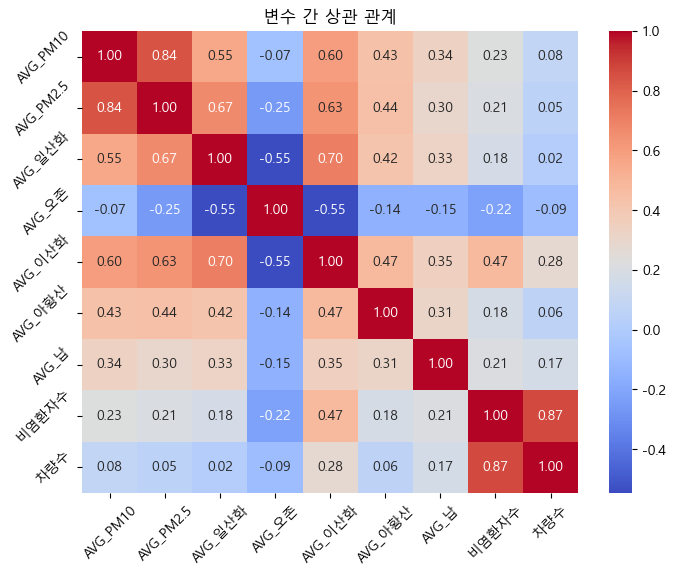

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 상관 계수 행렬 계산
corr_matrix = X.corr()
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# 레이블 및 타이틀 설정
plt.title('변수 간 상관 관계')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# 그래프 표시
plt.show()

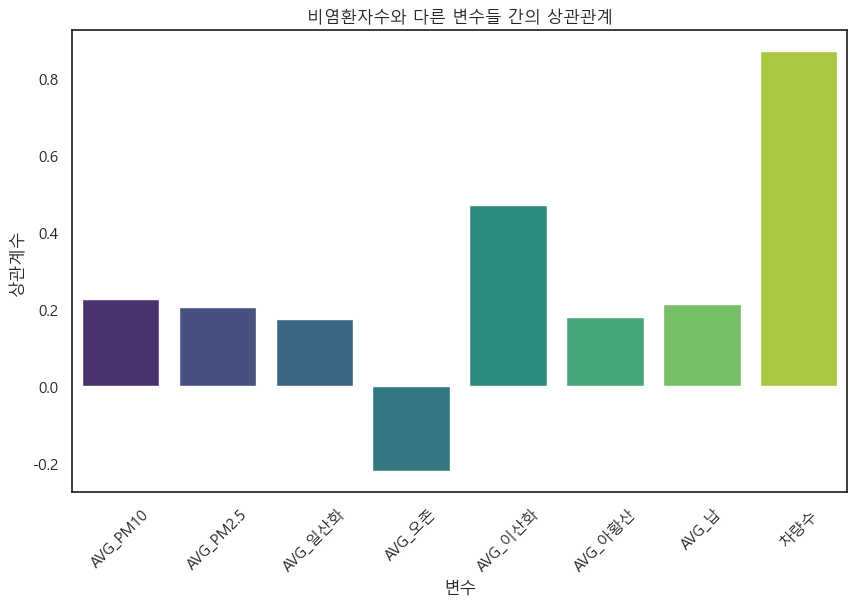

In [24]:
# '비염환자수'와 다른 변수들 간의 상관관계 행렬 생성
correlation_matrix = X.corr()['비염환자수'].drop('비염환자수')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관관계 행렬을 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette='viridis')
plt.title('비염환자수와 다른 변수들 간의 상관관계')
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.xticks(rotation=45)
plt.show()